## Import only packages needed for testing

In [1]:
import xarray as xr
#import matplotlib.pyplot as plt
#import numpy as np

## Weighted spatial mean

In [4]:
path = '/glade/campaign/cgd/ccr/kdagon/dlfront/B20TRC5CN/'

In [5]:
ds = xr.open_dataset(path+
    "b.e13.B20TRC5CN.ne120_g16.003.cam.h4.TS.2000010100Z-2000123121Z.regrid.dlfront.Merra.nc",
    decode_cf=False
)

In [6]:
ds

<xarray.Dataset>
Dimensions:       (time: 2920, lat: 68, lon: 141, chars: 8, ilev: 31, nbnd: 2,
                   lev: 30)
Coordinates:
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * lat           (lat) float64 10.0 11.0 12.0 13.0 14.0 ... 74.0 75.0 76.0 77.0
  * lon           (lon) float64 189.0 190.0 191.0 192.0 ... 327.0 328.0 329.0
  * time          (time) float64 5.475e+04 5.475e+04 ... 5.511e+04 5.512e+04
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
Dimensions without coordinates: chars, nbnd
Data variables: (12/32)
    P0            float64 ...
    TS            (time, lat, lon) float32 ...
    area          (lat, lon) float64 ...
    ch4vmr        (time) float64 ...
    co2vmr        (time) float64 ...
    date          (time) int32 ...
    ...            ...
    ntrn          int32 ...
    sol_tsi       (time) float64 ...
    time_bnds     (time, nbnd) float64 ...
    time_written  (time, chars) |S1 ...
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
Attributes: (12/21)
    np:                         4
    ne:                         120
    Conventions:                CF-1.0
    source:                     CAM
    case:                       b.e13.B20TRC5CN.ne120_g16.003
    title:                      UNSET
    ...                         ...
    remap_command:              '/glade/u/apps/dav/opt/nco/4.7.9/gnu/8.3.0/bi...
    remap_hostname:             casper21
    remap_version:              4.7.9
    map_file:                   /glade/scratch/jet/ClimateNet/data_processing...
    input_file:                 ./b.e13.B20TRC5CN.ne120_g16.003.cam.h4.TS.200...
    history_of_appended_files:  Mon Sep 21 14:54:12 2020: Appended file lev.n...

In [9]:
xlon, ylat = np.meshgrid(ds.lon, ds.lat)

In [10]:
xlon

array([[189., 190., 191., ..., 327., 328., 329.],
       [189., 190., 191., ..., 327., 328., 329.],
       [189., 190., 191., ..., 327., 328., 329.],
       ...,
       [189., 190., 191., ..., 327., 328., 329.],
       [189., 190., 191., ..., 327., 328., 329.],
       [189., 190., 191., ..., 327., 328., 329.]])

In [11]:
ylat

array([[10., 10., 10., ..., 10., 10., 10.],
       [11., 11., 11., ..., 11., 11., 11.],
       [12., 12., 12., ..., 12., 12., 12.],
       ...,
       [75., 75., 75., ..., 75., 75., 75.],
       [76., 76., 76., ..., 76., 76., 76.],
       [77., 77., 77., ..., 77., 77., 77.]])

In [12]:
dlat = np.deg2rad(np.gradient(ylat, axis=0))
dlat

array([[0.01745329, 0.01745329, 0.01745329, ..., 0.01745329, 0.01745329,
        0.01745329],
       [0.01745329, 0.01745329, 0.01745329, ..., 0.01745329, 0.01745329,
        0.01745329],
       [0.01745329, 0.01745329, 0.01745329, ..., 0.01745329, 0.01745329,
        0.01745329],
       ...,
       [0.01745329, 0.01745329, 0.01745329, ..., 0.01745329, 0.01745329,
        0.01745329],
       [0.01745329, 0.01745329, 0.01745329, ..., 0.01745329, 0.01745329,
        0.01745329],
       [0.01745329, 0.01745329, 0.01745329, ..., 0.01745329, 0.01745329,
        0.01745329]])

In [14]:
dy = dlat

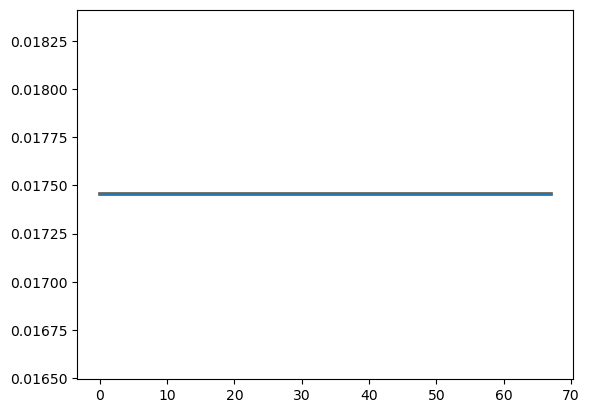

In [19]:
plt.plot(dy);

In [13]:
dlon = np.deg2rad(np.gradient(xlon, axis=1))
dlon

array([[0.01745329, 0.01745329, 0.01745329, ..., 0.01745329, 0.01745329,
        0.01745329],
       [0.01745329, 0.01745329, 0.01745329, ..., 0.01745329, 0.01745329,
        0.01745329],
       [0.01745329, 0.01745329, 0.01745329, ..., 0.01745329, 0.01745329,
        0.01745329],
       ...,
       [0.01745329, 0.01745329, 0.01745329, ..., 0.01745329, 0.01745329,
        0.01745329],
       [0.01745329, 0.01745329, 0.01745329, ..., 0.01745329, 0.01745329,
        0.01745329],
       [0.01745329, 0.01745329, 0.01745329, ..., 0.01745329, 0.01745329,
        0.01745329]])

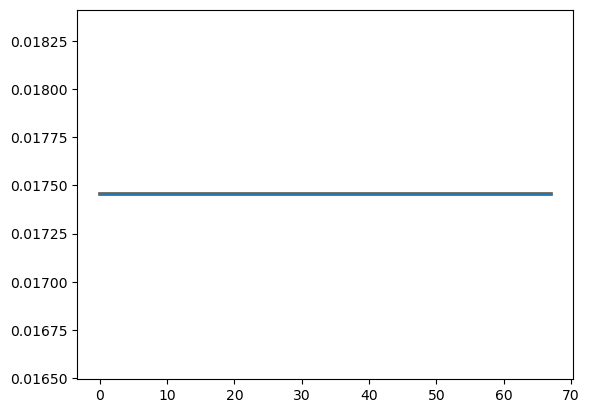

In [22]:
plt.plot(dlon);

In [15]:
dx = dlon * np.cos(np.deg2rad(ylat))

In [16]:
dx

array([[0.01718814, 0.01718814, 0.01718814, ..., 0.01718814, 0.01718814,
        0.01718814],
       [0.01713263, 0.01713263, 0.01713263, ..., 0.01713263, 0.01713263,
        0.01713263],
       [0.0170719 , 0.0170719 , 0.0170719 , ..., 0.0170719 , 0.0170719 ,
        0.0170719 ],
       ...,
       [0.00451724, 0.00451724, 0.00451724, ..., 0.00451724, 0.00451724,
        0.00451724],
       [0.00422233, 0.00422233, 0.00422233, ..., 0.00422233, 0.00422233,
        0.00422233],
       [0.00392614, 0.00392614, 0.00392614, ..., 0.00392614, 0.00392614,
        0.00392614]])

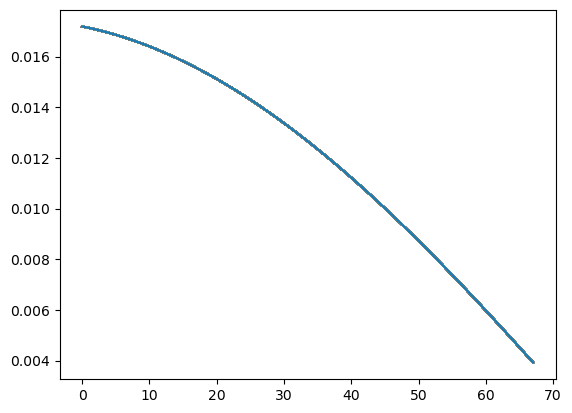

In [20]:
plt.plot(dx);

In [23]:
area = dy * dx
area

array([[2.99989597e-04, 2.99989597e-04, 2.99989597e-04, ...,
        2.99989597e-04, 2.99989597e-04, 2.99989597e-04],
       [2.99020740e-04, 2.99020740e-04, 2.99020740e-04, ...,
        2.99020740e-04, 2.99020740e-04, 2.99020740e-04],
       [2.97960798e-04, 2.97960798e-04, 2.97960798e-04, ...,
        2.97960798e-04, 2.97960798e-04, 2.97960798e-04],
       ...,
       [7.88407897e-05, 7.88407897e-05, 7.88407897e-05, ...,
        7.88407897e-05, 7.88407897e-05, 7.88407897e-05],
       [7.36936236e-05, 7.36936236e-05, 7.36936236e-05, ...,
        7.36936236e-05, 7.36936236e-05, 7.36936236e-05],
       [6.85240098e-05, 6.85240098e-05, 6.85240098e-05, ...,
        6.85240098e-05, 6.85240098e-05, 6.85240098e-05]])

In [26]:
area.shape

(68, 141)

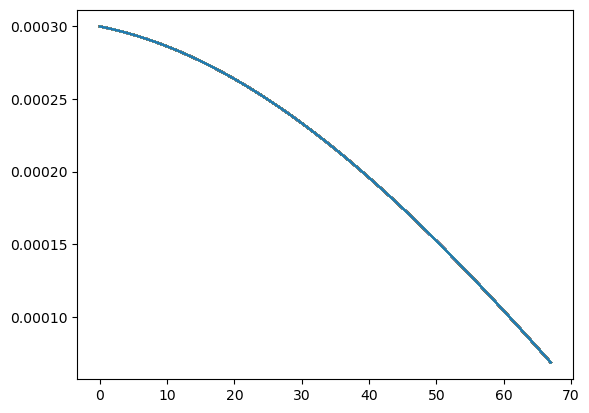

In [25]:
plt.plot(area);

In [28]:
area = xr.DataArray(
    area,
    dims=["lat", "lon"],
    coords={"lat": ds.lat, "lon": ds.lon},)
area

<xarray.DataArray (lat: 68, lon: 141)>
array([[2.99989597e-04, 2.99989597e-04, 2.99989597e-04, ...,
        2.99989597e-04, 2.99989597e-04, 2.99989597e-04],
       [2.99020740e-04, 2.99020740e-04, 2.99020740e-04, ...,
        2.99020740e-04, 2.99020740e-04, 2.99020740e-04],
       [2.97960798e-04, 2.97960798e-04, 2.97960798e-04, ...,
        2.97960798e-04, 2.97960798e-04, 2.97960798e-04],
       ...,
       [7.88407897e-05, 7.88407897e-05, 7.88407897e-05, ...,
        7.88407897e-05, 7.88407897e-05, 7.88407897e-05],
       [7.36936236e-05, 7.36936236e-05, 7.36936236e-05, ...,
        7.36936236e-05, 7.36936236e-05, 7.36936236e-05],
       [6.85240098e-05, 6.85240098e-05, 6.85240098e-05, ...,
        6.85240098e-05, 6.85240098e-05, 6.85240098e-05]])
Coordinates:
  * lat      (lat) float64 10.0 11.0 12.0 13.0 14.0 ... 73.0 74.0 75.0 76.0 77.0
  * lon      (lon) float64 189.0 190.0 191.0 192.0 ... 326.0 327.0 328.0 329.0

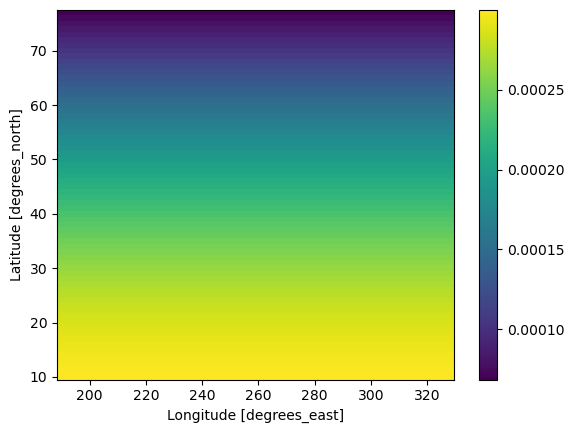

In [39]:
area.plot()

In [40]:
# compare to CESM history file area
ds.area

<xarray.DataArray 'area' (lat: 68, lon: 141)>
[9588 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 10.0 11.0 12.0 13.0 14.0 ... 73.0 74.0 75.0 76.0 77.0
  * lon      (lon) float64 189.0 190.0 191.0 192.0 ... 326.0 327.0 328.0 329.0
Attributes:
    long_name:      Solid angle subtended by gridcell
    standard_name:  area
    units:          steradian
    cell_methods:   lat, lon: sum

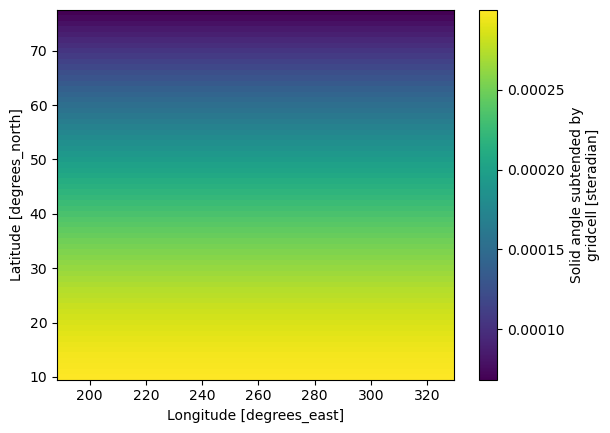

In [41]:
ds.area.plot()

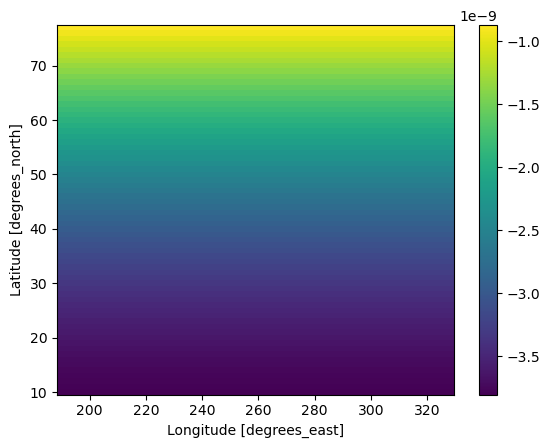

In [42]:
areadiff = ds.area - area
areadiff.plot()

In [30]:
ds.TS

<xarray.DataArray 'TS' (time: 2920, lat: 68, lon: 141)>
[27996960 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 10.0 11.0 12.0 13.0 14.0 ... 73.0 74.0 75.0 76.0 77.0
  * lon      (lon) float64 189.0 190.0 191.0 192.0 ... 326.0 327.0 328.0 329.0
  * time     (time) float64 5.475e+04 5.475e+04 ... 5.511e+04 5.512e+04
Attributes:
    units:          K
    long_name:      Surface temperature (radiative)
    cell_measures:  area: area

In [31]:
data_weighted = (ds.TS*area).sum(['lat','lon'])/area.sum(['lat','lon']) # == data.weighted(weights)

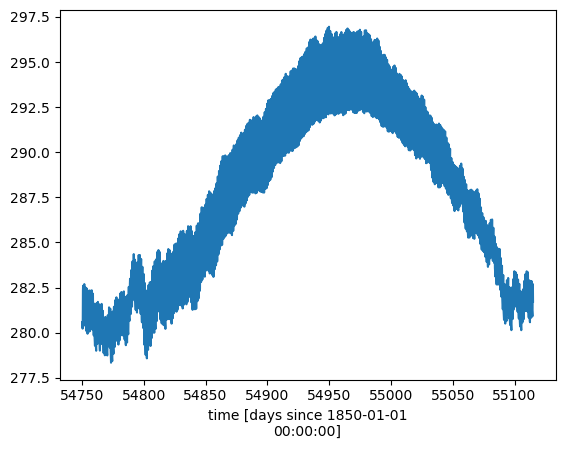

In [33]:
data_weighted.plot()

In [34]:
# xarray version
weights = np.cos(np.deg2rad(ds.lat))
weights.name = "weights"
weights

<xarray.DataArray 'weights' (lat: 68)>
array([0.98480775, 0.98162718, 0.9781476 , 0.97437006, 0.97029573,
       0.96592583, 0.9612617 , 0.95630476, 0.95105652, 0.94551858,
       0.93969262, 0.93358043, 0.92718385, 0.92050485, 0.91354546,
       0.90630779, 0.89879405, 0.89100652, 0.88294759, 0.87461971,
       0.8660254 , 0.8571673 , 0.8480481 , 0.83867057, 0.82903757,
       0.81915204, 0.80901699, 0.79863551, 0.78801075, 0.77714596,
       0.76604444, 0.75470958, 0.74314483, 0.7313537 , 0.7193398 ,
       0.70710678, 0.69465837, 0.68199836, 0.66913061, 0.65605903,
       0.64278761, 0.62932039, 0.61566148, 0.60181502, 0.58778525,
       0.57357644, 0.5591929 , 0.54463904, 0.52991926, 0.51503807,
       0.5       , 0.48480962, 0.46947156, 0.4539905 , 0.43837115,
       0.42261826, 0.40673664, 0.39073113, 0.37460659, 0.35836795,
       0.34202014, 0.32556815, 0.30901699, 0.2923717 , 0.27563736,
       0.25881905, 0.2419219 , 0.22495105])
Coordinates:
  * lat      (lat) float64 10.0 11.0 12.0 13.0 14.0 ... 73.0 74.0 75.0 76.0 77.0
Attributes:
    long_name:      Latitude
    standard_name:  latitude
    units:          degrees_north
    axis:           Y
    valid_min:      -90.0
    valid_max:      90.0
    bounds:         lat_bnds

In [35]:
data_weighted_xr = ds.TS.weighted(weights)
data_weighted_xr

DataArrayWeighted with weights along dimensions: lat

In [36]:
weighted_mean = data_weighted_xr.mean(("lon", "lat"))
weighted_mean

<xarray.DataArray 'TS' (time: 2920)>
array([280.57652315, 280.41982644, 280.2961194 , ..., 282.50041035,
       282.69085565, 281.72151777])
Coordinates:
  * time     (time) float64 5.475e+04 5.475e+04 ... 5.511e+04 5.512e+04

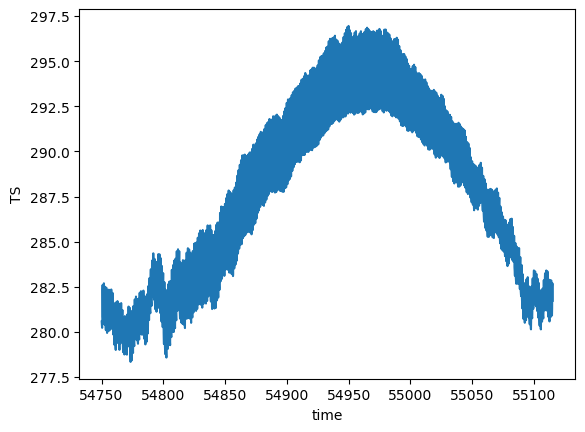

In [37]:
weighted_mean.plot()

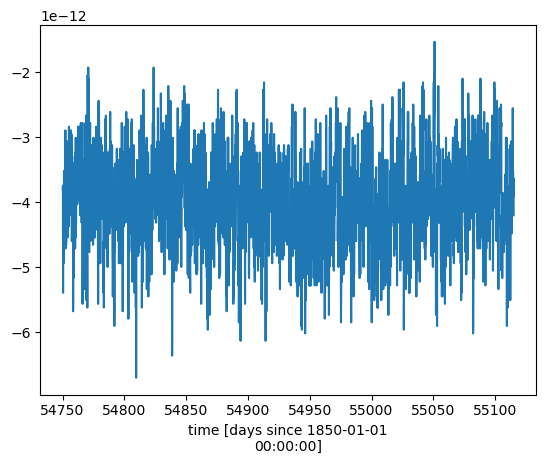

In [38]:
diff = data_weighted - weighted_mean
diff.plot()

## Debugging H5 errors and s2s input data

### Clean test

In [2]:
data_path = '/glade/scratch/molina/'
week = 3
var  = 'tas2m'
if var == 'tas2m':
    v = 'tas_2m'
elif var == 'prsfc':
    v = 'pr_sfc'
cesm_fi_202 = 'cesm_'+var+'_week'+str(week)+'/cm_'+var+'_202*.nc' # test multiple but not all years
X_202 = xr.open_mfdataset(data_path+cesm_fi_202, concat_dim='sample', combine='nested')[v]
X_202.values

array([[[247.02309, 247.02306, 247.0231 , ..., 247.02309, 247.02309,
         247.02309],
        [247.60634, 247.58408, 247.48892, ..., 247.65811, 247.64647,
         247.62975],
        [248.2348 , 248.17032, 248.12738, ..., 248.43626, 248.38756,
         248.32831],
        ...,
        [246.9197 , 246.93285, 246.94476, ..., 246.8796 , 246.89333,
         246.90634],
        [246.49261, 246.50175, 246.51076, ..., 246.45938, 246.47145,
         246.48247],
        [245.94994, 245.95164, 245.95322, ..., 245.94391, 245.94606,
         245.94806]],

       [[247.14598, 247.14598, 247.14598, ..., 247.14598, 247.14598,
         247.14598],
        [248.17622, 248.15265, 248.06084, ..., 248.21255, 248.20685,
         248.19582],
        [248.75072, 248.68315, 248.64351, ..., 248.94005, 248.89569,
         248.83731],
        ...,
        [246.83789, 246.86357, 246.88808, ..., 246.76807, 246.79077,
         246.81343],
        [246.4026 , 246.41502, 246.42743, ..., 246.36118, 246.3756 ,
   

In [3]:
X_202

<xarray.DataArray 'tas_2m' (sample: 103, lat: 181, lon: 360)>
dask.array<concatenate, shape=(103, 181, 360), dtype=float32, chunksize=(1, 181, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * sample   (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0

In [4]:
import xarray as xr
data_path = '/glade/scratch/molina/'
week = 3
var  = 'tas2m'
if var == 'tas2m':
    v = 'tas_2m'
elif var == 'prsfc':
    v = 'pr_sfc'
cesm_fi_1999 = 'cesm_'+var+'_week'+str(week)+'/cm_'+var+'_1999*.nc' # test one year
X_1999 = xr.open_mfdataset(data_path+cesm_fi_1999, concat_dim='sample', combine='nested')[v]
X_1999.values

array([[[235.15184, 235.15181, 235.15181, ..., 235.15181, 235.15184,
         235.15184],
        [235.53387, 235.5067 , 235.41083, ..., 235.57753, 235.56476,
         235.54962],
        [236.16908, 236.1028 , 236.06146, ..., 236.37433, 236.32436,
         236.25839],
        ...,
        [239.7425 , 239.76172, 239.78008, ..., 239.6955 , 239.71034,
         239.72557],
        [239.33731, 239.34413, 239.35109, ..., 239.31548, 239.32275,
         239.3301 ],
        [239.10254, 239.10274, 239.10294, ..., 239.10176, 239.10205,
         239.10228]],

       [[232.89093, 232.89093, 232.89093, ..., 232.89093, 232.89093,
         232.89093],
        [233.64024, 233.61012, 233.51689, ..., 233.6748 , 233.66577,
         233.65399],
        [234.55128, 234.48451, 234.44258, ..., 234.75514, 234.7069 ,
         234.64098],
        ...,
        [246.35991, 246.37267, 246.38472, ..., 246.32964, 246.34018,
         246.3495 ],
        [245.79834, 245.80475, 245.81134, ..., 245.7749 , 245.78355,
   

In [5]:
cesm_fi = 'cesm_'+var+'_week'+str(week)+'/cm_'+var+'_*.nc' # all years
X = xr.open_mfdataset(data_path+cesm_fi, concat_dim='sample', combine='nested')[v]
X.values

array([[[235.15184, 235.15181, 235.15181, ..., 235.15181, 235.15184,
         235.15184],
        [235.53387, 235.5067 , 235.41083, ..., 235.57753, 235.56476,
         235.54962],
        [236.16908, 236.1028 , 236.06146, ..., 236.37433, 236.32436,
         236.25839],
        ...,
        [239.7425 , 239.76172, 239.78008, ..., 239.6955 , 239.71034,
         239.72557],
        [239.33731, 239.34413, 239.35109, ..., 239.31548, 239.32275,
         239.3301 ],
        [239.10254, 239.10274, 239.10294, ..., 239.10176, 239.10205,
         239.10228]],

       [[232.89093, 232.89093, 232.89093, ..., 232.89093, 232.89093,
         232.89093],
        [233.64024, 233.61012, 233.51689, ..., 233.6748 , 233.66577,
         233.65399],
        [234.55128, 234.48451, 234.44258, ..., 234.75514, 234.7069 ,
         234.64098],
        ...,
        [246.35991, 246.37267, 246.38472, ..., 246.32964, 246.34018,
         246.3495 ],
        [245.79834, 245.80475, 245.81134, ..., 245.7749 , 245.78355,
   

### Try a single file

In [2]:
s2spath = '/glade/scratch/molina/cesm_tas2m_anom_week3/'

In [3]:
s2sfile = 'cm_tas2m_anom_20121022.nc'

In [4]:
test = xr.open_dataset(s2spath+s2sfile)
test

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, sample: 1)
Coordinates:
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * sample   (sample) int64 0
Data variables:
    anom     (sample, lat, lon) float64 ...

In [5]:
test.anom

<xarray.DataArray 'anom' (sample: 1, lat: 181, lon: 360)>
[65160 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * sample   (sample) int64 0

`.values` works on a single file

In [6]:
test.anom.values

array([[[0.5588468 , 0.55884642, 0.55884653, ..., 0.5588465 ,
         0.55884641, 0.5588464 ],
        [0.57025424, 0.57350454, 0.57691333, ..., 0.56038123,
         0.56339708, 0.56671094],
        [0.50829629, 0.51514329, 0.52058141, ..., 0.48796988,
         0.4961785 , 0.50294494],
        ...,
        [1.33622934, 1.31716843, 1.29947155, ..., 1.39426315,
         1.3756174 , 1.35659511],
        [1.37159816, 1.36134903, 1.3509796 , ..., 1.40476364,
         1.3930695 , 1.38217717],
        [1.35826132, 1.35764464, 1.35706635, ..., 1.36044095,
         1.35966227, 1.35893473]]])

In [7]:
tv = 'anom'

In [8]:
test[tv].values

array([[[0.5588468 , 0.55884642, 0.55884653, ..., 0.5588465 ,
         0.55884641, 0.5588464 ],
        [0.57025424, 0.57350454, 0.57691333, ..., 0.56038123,
         0.56339708, 0.56671094],
        [0.50829629, 0.51514329, 0.52058141, ..., 0.48796988,
         0.4961785 , 0.50294494],
        ...,
        [1.33622934, 1.31716843, 1.29947155, ..., 1.39426315,
         1.3756174 , 1.35659511],
        [1.37159816, 1.36134903, 1.3509796 , ..., 1.40476364,
         1.3930695 , 1.38217717],
        [1.35826132, 1.35764464, 1.35706635, ..., 1.36044095,
         1.35966227, 1.35893473]]])

### What about multiple files?

In [10]:
# ---------- Load data ----------
#data_path = '/glade/gust/scratch/molina/'
data_path = '/glade/scratch/molina/'
week = 3       # 1-6
#var  = 'prsfc' # 'prsfc' or 'tas2m'
var = 'tas2m'
if var == 'tas2m':
    v = 'tas_2m'
elif var == 'prsfc':
    v = 'pr_sfc'
# !!! if i use anoms, i need to correct a lead time issue (see torch_s2s_dataset.py line 217-219) !!!
train_startdt = '1999-02-01' 
train_enddt   = '2015-12-31'
val_startdt   = '2016-01-01'
val_enddt     = '2017-12-31'

#cesm_fi = 'cesm_'+var+'_week'+str(week)+'/cm_'+var+'_1999*.nc' # test one year
cesm_fi = 'cesm_'+var+'_week'+str(week)+'/cm_'+var+'_*.nc' # really seems like error is triggered when using ALL the years
X = xr.open_mfdataset(data_path+cesm_fi, concat_dim='sample', combine='nested')[v]

#era_fi   = 'era5_'+var+'_week'+str(week)+'/e5_'+var+'_*.nc'
#Y = xr.open_mfdataset(data_path+era_fi, concat_dim='sample', combine='nested')[v]
#Y = Y.rename({'y': 'lat','x': 'lon'})

In [15]:
X

<xarray.DataArray 'tas_2m' (sample: 1195, lat: 181, lon: 360)>
dask.array<concatenate, shape=(1195, 181, 360), dtype=float32, chunksize=(1, 181, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * sample   (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
X.values

In [25]:
# ncview doesn't like cm_tas2m_20180820.nc
#bug_file = 'cesm_tas2m_week3/cm_tas2m_20180820.nc'
cesm_fi_2018 = 'cesm_'+var+'_week'+str(week)+'/cm_'+var+'_2018*.nc'
X_2018 = xr.open_mfdataset(data_path+cesm_fi_2018, concat_dim='sample', combine='nested')[v]
X_2018

<xarray.DataArray 'tas_2m' (sample: 53, lat: 181, lon: 360)>
dask.array<concatenate, shape=(53, 181, 360), dtype=float32, chunksize=(1, 181, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * sample   (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0

In [26]:
X_2018.values

array([[[250.1072 , 250.10728, 250.10732, ..., 250.10722, 250.1072 ,
         250.1072 ],
        [250.60309, 250.57324, 250.47882, ..., 250.65501, 250.64   ,
         250.61972],
        [250.91327, 250.86264, 250.83847, ..., 251.07306, 251.03636,
         250.98744],
        ...,
        [246.78676, 246.79323, 246.79834, ..., 246.76314, 246.77095,
         246.77856],
        [246.77246, 246.773  , 246.77357, ..., 246.77028, 246.7713 ,
         246.77188],
        [246.8487 , 246.84901, 246.84927, ..., 246.84766, 246.84804,
         246.84839]],

       [[247.33055, 247.33055, 247.33055, ..., 247.33055, 247.33057,
         247.33055],
        [248.04887, 248.01239, 247.90993, ..., 248.09854, 248.0853 ,
         248.07022],
        [248.66113, 248.59248, 248.54189, ..., 248.85712, 248.81427,
         248.75153],
        ...,
        [247.25397, 247.28236, 247.3101 , ..., 247.17725, 247.2029 ,
         247.22763],
        [247.0058 , 247.01659, 247.02759, ..., 246.9703 , 246.9828 ,
   

In [13]:
#Xtest = xr.open_mfdataset(data_path+cesm_fi, concat_dim='sample', combine='nested').pr_sfc
Xtest = xr.open_mfdataset(data_path+cesm_fi, concat_dim='sample', combine='nested').tas_2m
Xtest

<xarray.DataArray 'tas_2m' (sample: 1195, lat: 181, lon: 360)>
dask.array<concatenate, shape=(1195, 181, 360), dtype=float32, chunksize=(1, 181, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * sample   (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0

In [14]:
Xtest.values

HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 1:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize object
  #005: H5Oattribute.c line 494 in H5O__attr_open_by_name(): can't locate attribute: '_QuantizeBitGroomNumberOfSignificantDigits'
    major: Attribute
    minor: Object not found
HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 1:
  #000: H5A.c line 528 in H5Ao

array([[[235.15184, 235.15181, 235.15181, ..., 235.15181, 235.15184,
         235.15184],
        [235.53387, 235.5067 , 235.41083, ..., 235.57753, 235.56476,
         235.54962],
        [236.16908, 236.1028 , 236.06146, ..., 236.37433, 236.32436,
         236.25839],
        ...,
        [239.7425 , 239.76172, 239.78008, ..., 239.6955 , 239.71034,
         239.72557],
        [239.33731, 239.34413, 239.35109, ..., 239.31548, 239.32275,
         239.3301 ],
        [239.10254, 239.10274, 239.10294, ..., 239.10176, 239.10205,
         239.10228]],

       [[232.89093, 232.89093, 232.89093, ..., 232.89093, 232.89093,
         232.89093],
        [233.64024, 233.61012, 233.51689, ..., 233.6748 , 233.66577,
         233.65399],
        [234.55128, 234.48451, 234.44258, ..., 234.75514, 234.7069 ,
         234.64098],
        ...,
        [246.35991, 246.37267, 246.38472, ..., 246.32964, 246.34018,
         246.3495 ],
        [245.79834, 245.80475, 245.81134, ..., 245.7749 , 245.78355,
   

In [2]:
data_path = '/glade/scratch/molina/'
week = 3       # 1-6
var  = 'tas2m' # 'prsfc' or 'tas2m'
if var == 'tas2m':
    v = 'tas_2m'
elif var == 'prsfc':
    v = 'pr_sfc'
    
cesm_fi = 'cesm_'+var+'_week'+str(week)+'/cm_'+var+'_1999*.nc' # test one year
#cesm_fi = 'cesm_'+var+'_week'+str(week)+'/cm_'+var+'_*.nc'

In [3]:
cesm_fi

'cesm_tas2m_week3/cm_tas2m_1999*.nc'

In [9]:
X = xr.open_mfdataset(data_path+cesm_fi, concat_dim='sample', combine='nested').tas_2m

In [10]:
X

<xarray.DataArray 'tas_2m' (sample: 48, lat: 181, lon: 360)>
dask.array<concatenate, shape=(48, 181, 360), dtype=float32, chunksize=(1, 181, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * sample   (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0

In [11]:
X.values

array([[[235.15184, 235.15181, 235.15181, ..., 235.15181, 235.15184,
         235.15184],
        [235.53387, 235.5067 , 235.41083, ..., 235.57753, 235.56476,
         235.54962],
        [236.16908, 236.1028 , 236.06146, ..., 236.37433, 236.32436,
         236.25839],
        ...,
        [239.7425 , 239.76172, 239.78008, ..., 239.6955 , 239.71034,
         239.72557],
        [239.33731, 239.34413, 239.35109, ..., 239.31548, 239.32275,
         239.3301 ],
        [239.10254, 239.10274, 239.10294, ..., 239.10176, 239.10205,
         239.10228]],

       [[232.89093, 232.89093, 232.89093, ..., 232.89093, 232.89093,
         232.89093],
        [233.64024, 233.61012, 233.51689, ..., 233.6748 , 233.66577,
         233.65399],
        [234.55128, 234.48451, 234.44258, ..., 234.75514, 234.7069 ,
         234.64098],
        ...,
        [246.35991, 246.37267, 246.38472, ..., 246.32964, 246.34018,
         246.3495 ],
        [245.79834, 245.80475, 245.81134, ..., 245.7749 , 245.78355,
   

In [11]:
v

'tas_2m'

In [4]:
Xfail = xr.open_mfdataset(data_path+cesm_fi, concat_dim='sample', combine='nested')[v]
Xfail

<xarray.DataArray 'tas_2m' (sample: 48, lat: 181, lon: 360)>
dask.array<concatenate, shape=(48, 181, 360), dtype=float32, chunksize=(1, 181, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * sample   (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0

In [5]:
Xfail.values

array([[[235.15184, 235.15181, 235.15181, ..., 235.15181, 235.15184,
         235.15184],
        [235.53387, 235.5067 , 235.41083, ..., 235.57753, 235.56476,
         235.54962],
        [236.16908, 236.1028 , 236.06146, ..., 236.37433, 236.32436,
         236.25839],
        ...,
        [239.7425 , 239.76172, 239.78008, ..., 239.6955 , 239.71034,
         239.72557],
        [239.33731, 239.34413, 239.35109, ..., 239.31548, 239.32275,
         239.3301 ],
        [239.10254, 239.10274, 239.10294, ..., 239.10176, 239.10205,
         239.10228]],

       [[232.89093, 232.89093, 232.89093, ..., 232.89093, 232.89093,
         232.89093],
        [233.64024, 233.61012, 233.51689, ..., 233.6748 , 233.66577,
         233.65399],
        [234.55128, 234.48451, 234.44258, ..., 234.75514, 234.7069 ,
         234.64098],
        ...,
        [246.35991, 246.37267, 246.38472, ..., 246.32964, 246.34018,
         246.3495 ],
        [245.79834, 245.80475, 245.81134, ..., 245.7749 , 245.78355,
   

In [ ]:
X.isel(sample=0).plot()